In [82]:
import numpy as np
import pandas as pd 
import seaborn as snb
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder ,  StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split

In [60]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [61]:
df = pd.read_excel("Wholesale customers data.xlsx")
print ("data is read")

data is read


In [62]:
df.shape

(440, 8)

In [63]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [64]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [65]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [67]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [68]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [69]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

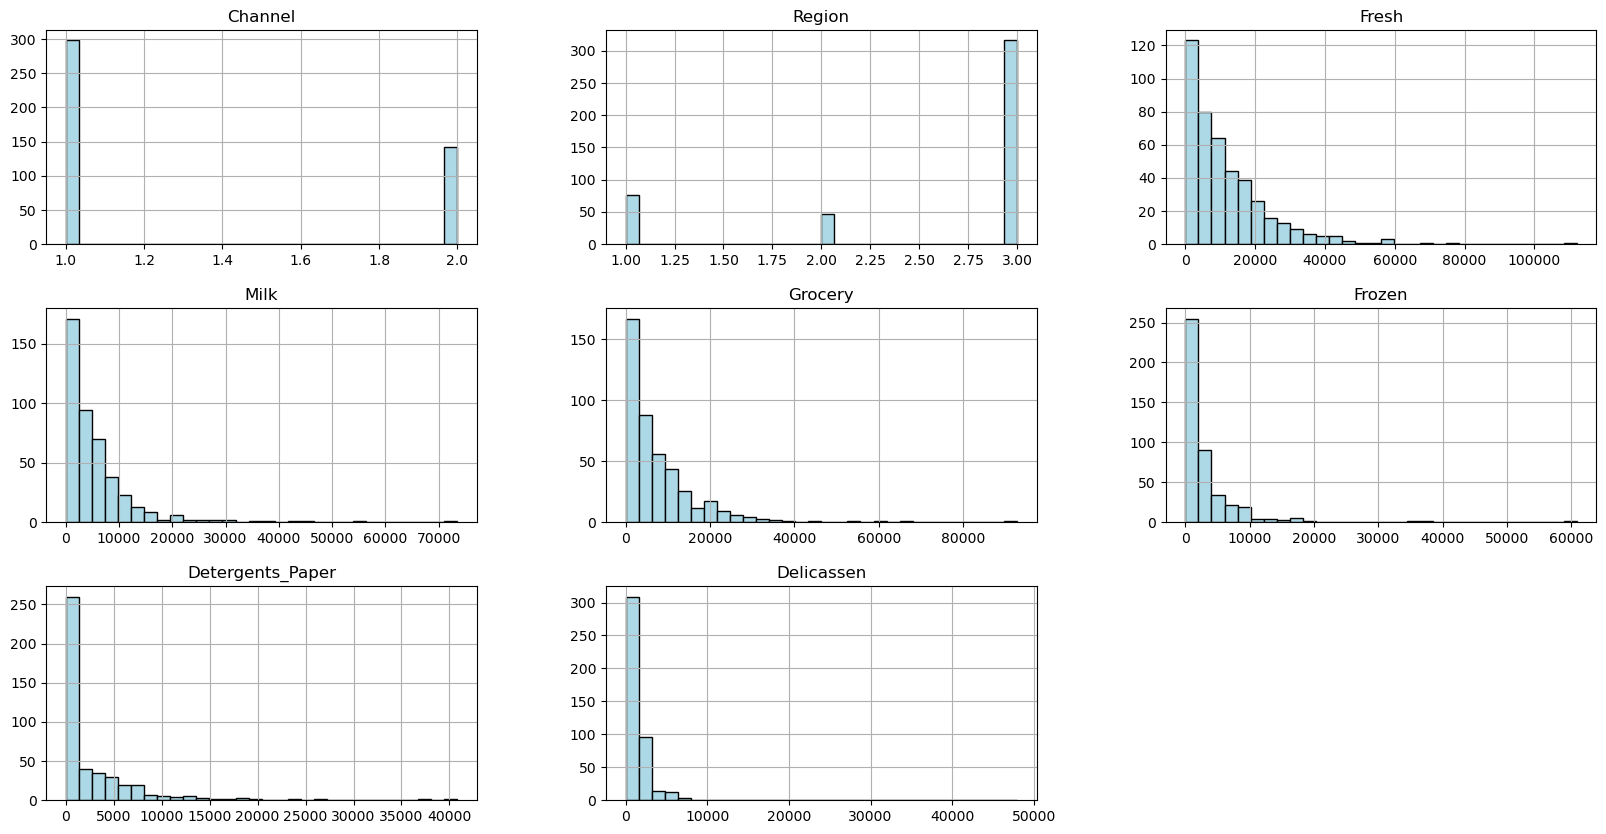

In [74]:
df.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

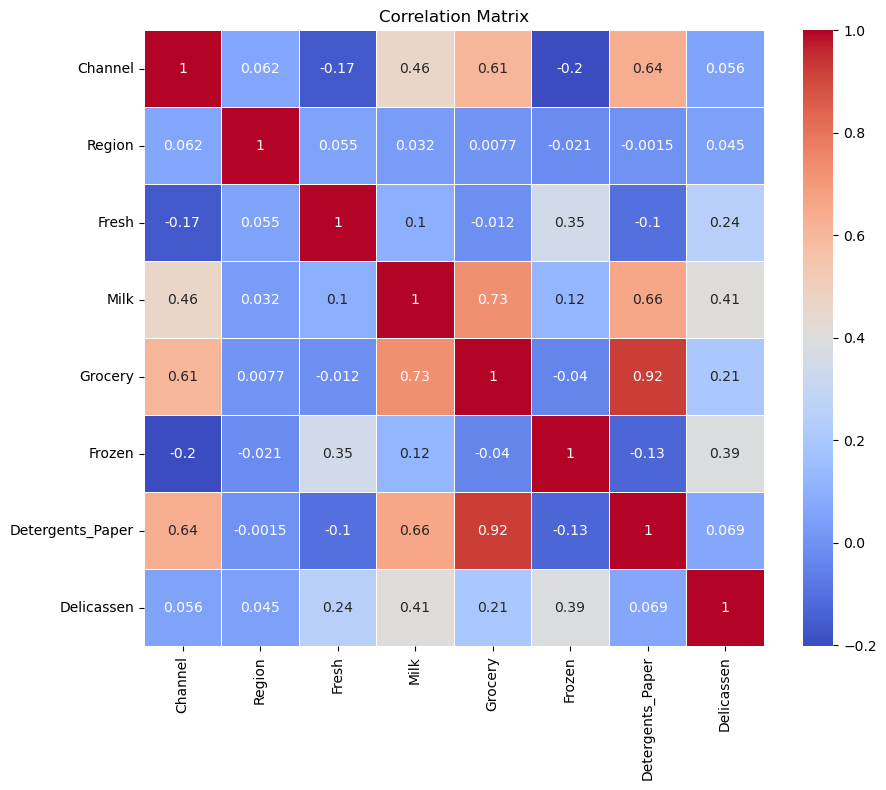

In [78]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
snb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Grouped by Region:
         Channel         Fresh         Milk      Grocery       Frozen  \
Region                                                                  
1       1.233766  11101.727273  5486.415584  7403.077922  3000.337662   
2       1.404255   9887.680851  5088.170213  9218.595745  4045.361702   
3       1.332278  12533.471519  5977.085443  7896.363924  2944.594937   

        Detergents_Paper   Delicassen  
Region                                 
1            2651.116883  1354.896104  
2            3687.468085  1159.702128  
3            2817.753165  1620.601266  

Grouped by Channel:
           Region         Fresh          Milk       Grocery       Frozen  \
Channel                                                                    
1        2.510067  13475.560403   3451.724832   3962.137584  3748.251678   
2        2.612676   8904.323944  10716.500000  16322.852113  1652.612676   

         Detergents_Paper   Delicassen  
Channel                                 
1      

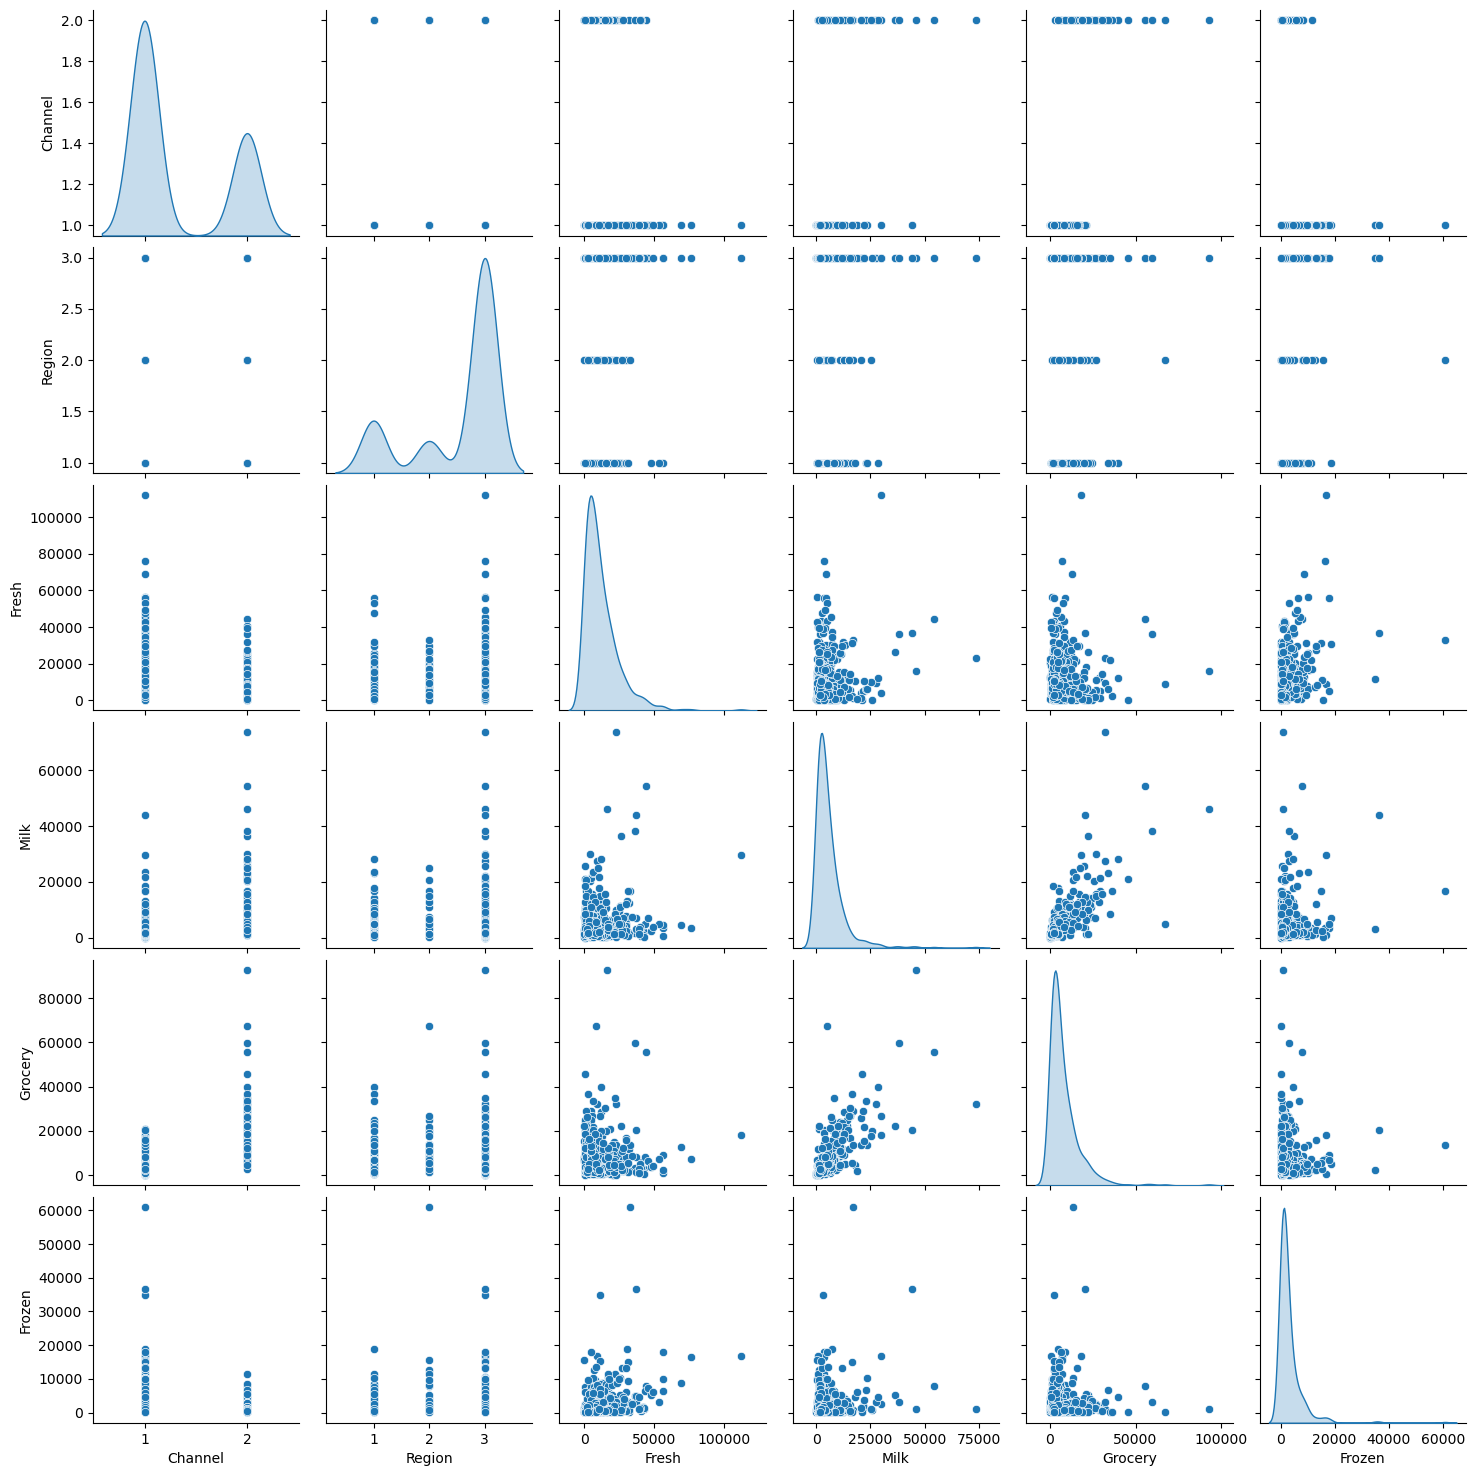

In [80]:
# Grouped Analysis
grouped_by_region = df.groupby('Region').mean()
grouped_by_channel = df.groupby('Channel').mean()
print("Grouped by Region:")
print(grouped_by_region)
print("\nGrouped by Channel:")
print(grouped_by_channel)

# Data Visualization (Scatter Plots)
snb.pairplot(df, vars=df.columns[:6], diag_kind='kde')
plt.show()

In [89]:
pd.DataFrame(df).describe().head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937


In [99]:
scaler_MinMax = MinMaxScaler().fit_transform(df)
scaler_MinMax[:5]

array([[1.        , 1.        , 0.11294004, 0.13072723, 0.08146416,
        0.0031063 , 0.0654272 , 0.02784731],
       [1.        , 1.        , 0.06289903, 0.13282409, 0.10309667,
        0.02854842, 0.08058985, 0.03698373],
       [1.        , 1.        , 0.05662161, 0.11918086, 0.08278992,
        0.03911643, 0.08605232, 0.16355861],
       [0.        , 1.        , 0.11825445, 0.01553586, 0.04546385,
        0.10484189, 0.01234568, 0.03723404],
       [1.        , 1.        , 0.20162642, 0.07291369, 0.07755155,
        0.063934  , 0.04345483, 0.10809345]])

In [100]:
pd.DataFrame(scaler_MinMax).describe().head(3)

,0,1,2,3,4,5,6,7
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.07051,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.11679,0.058826


In [101]:
scaler_Standard = StandardScaler().fit_transform(df)
scaler_Standard[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [102]:
pd.DataFrame(scaler_Standard).describe().head(3)

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
